<a href="https://colab.research.google.com/github/venkateshblks/Timeseries/blob/main/Timeseries.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Preparation and Exploration

In [ ]:
ex=pd.read_csv('exchange_rate.csv',header=0, index_col=0, parse_dates=True)
ex

,Ex_rate
date,
01-01-1990 00:00,0.785500
02-01-1990 00:00,0.781800
03-01-1990 00:00,0.786700
04-01-1990 00:00,0.786000
05-01-1990 00:00,0.784900
...,...
06-10-2010 00:00,0.718494
07-10-2010 00:00,0.721839
08-10-2010 00:00,0.723197


In [ ]:
ex.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7588 entries, 01-01-1990 00:00 to 10-10-2010 00:00
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Ex_rate  7588 non-null   float64
dtypes: float64(1)
memory usage: 118.6+ KB


In [ ]:
ex.isna().sum()

Ex_rate    0
dtype: int64

In [ ]:
ex.index.isna().sum()

0

In [ ]:
ex.index = ex.index.str.replace(' 00:00', '')

# Convert date column to datetime
ex.index = pd.to_datetime(ex.index, format='%d-%m-%Y')

In [ ]:
ex

,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.781800
1990-01-03,0.786700
1990-01-04,0.786000
1990-01-05,0.784900
...,...
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197


<Figure size 1200x300 with 0 Axes>

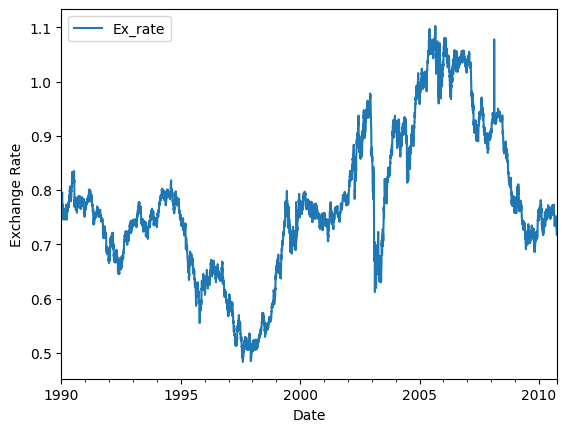

<Figure size 1200x300 with 0 Axes>

In [ ]:
ex.plot()
plt.xlabel('Date')
plt.ylabel('Exchange Rate')

array([[<Axes: title={'center': 'Ex_rate'}>]], dtype=object)

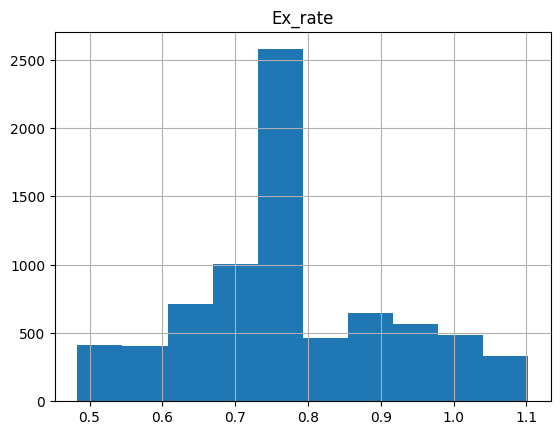

In [ ]:
ex.hist()

<Axes: ylabel='Density'>

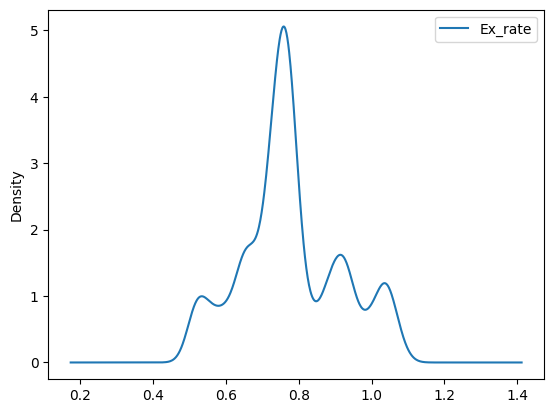

In [ ]:
ex.plot(kind='kde')

<Axes: xlabel='date', ylabel='Ex_rate'>

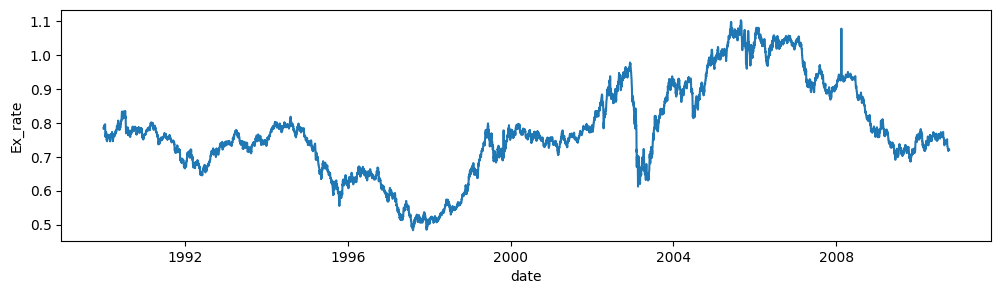

In [ ]:
plt.figure(figsize=(12,3))
sns.lineplot(x=ex.index,y="Ex_rate",data=ex)

## Model Building - ARIMA

In [ ]:
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from sklearn.metrics import mean_squared_error
from math import sqrt
from statsmodels.tsa.arima.model import ARIMA


In [ ]:
import warnings
warnings.filterwarnings("ignore")

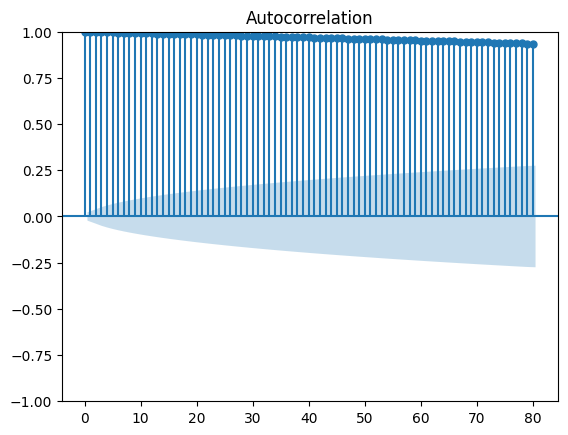

In [ ]:
k=plot_acf(ex,lags=80)

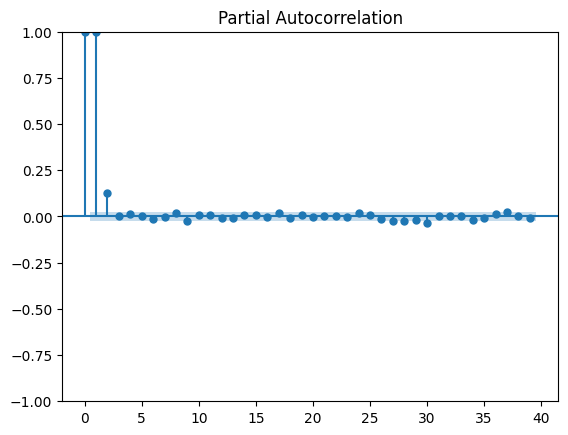

In [ ]:
k=plot_pacf(ex)

In [ ]:
X = ex.values
X = X.astype('float32')
train_size = int(len(X) * 0.50)
train, test = X[0:train_size], X[train_size:]
len(train)

3794

In [ ]:
# walk-forward validation
history = [x for x in train]
predictions = list()
for i in range(len(test)):
    yhat = history[-1]
    predictions.append(yhat)
# observation
    obs = test[i]
    history.append(obs)
    # print('>Predicted=%.3f, Expected=%.3f' % (yhat, obs))
# report performance
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

RMSE: 0.007


In [ ]:
import itertools

p_range = range(0, 5)
d_range = range(0, 5)
q_range = range(0, 5)

# Perform grid search
best_aic = float('inf')
best_pdq = None

for pdq in itertools.product(p_range, d_range, q_range):
    try:
        model = ARIMA(train, order=pdq)
        arima_result = model.fit()
        aic = arima_result.aic
        if aic < best_aic:
            best_aic = aic
            best_pdq = pdq
    except:
        continue

print("Best AIC:", best_aic)
print("Best (p, d, q):", best_pdq)


Best AIC: -30065.823063316162
Best (p, d, q): (4, 0, 4)


In [ ]:
model = ARIMA(train, order=(4,0,4))
results = model.fit()

In [ ]:
results.forecast(10)

array([0.75470034, 0.75446156, 0.7545687 , 0.75459576, 0.75448789,
       0.75424417, 0.75417028, 0.75421275, 0.75420982, 0.75404361])

Text(0.5, 1.0, 'Residuals of ARIMA Model')

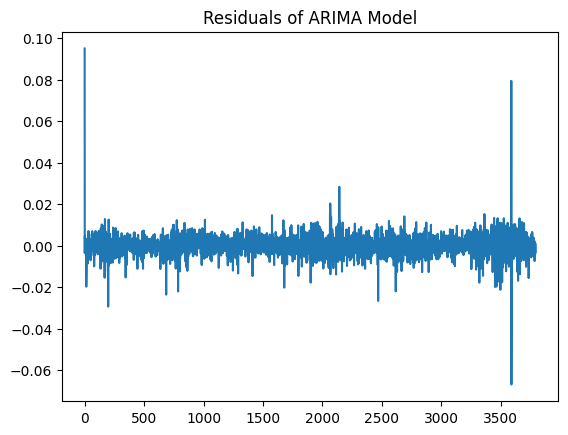

In [ ]:
residuals = results.resid
plt.plot(residuals)
plt.title('Residuals of ARIMA Model')

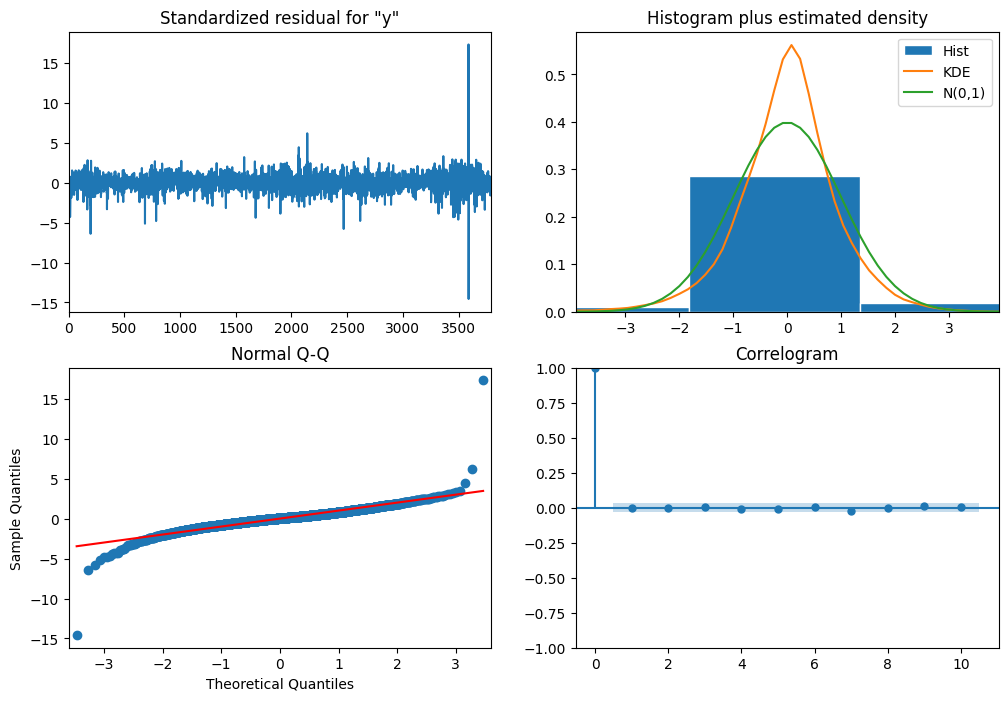

In [ ]:
k=results.plot_diagnostics(figsize=(12, 8))

In [ ]:
train_df=pd.DataFrame(train,columns=['actual'])
train_df

,actual
0,0.78550
1,0.78180
2,0.78670
3,0.78600
4,0.78490
...,...
3789,0.75695
3790,0.75705
3791,0.75795
3792,0.75785


In [ ]:
fc=results.forecast(200)
fc_df=pd.DataFrame(fc,columns=['forecasted'])

fc_df

,forecasted
0,0.754700
1,0.754462
2,0.754569
3,0.754596
4,0.754488
...,...
195,0.741469
196,0.741409
197,0.741349
198,0.741289


In [ ]:
new_df=pd.concat([train_df,fc_df])
new_df

,actual,forecasted
0,0.7855,NaN
1,0.7818,NaN
2,0.7867,NaN
3,0.7860,NaN
4,0.7849,NaN
...,...,...
195,NaN,0.741469
196,NaN,0.741409
197,NaN,0.741349
198,NaN,0.741289


<Axes: >

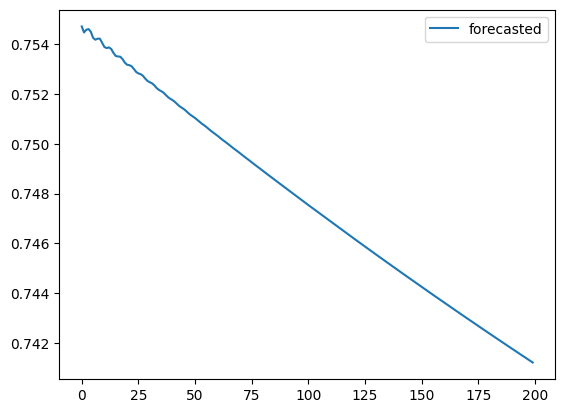

In [ ]:
fc_df.plot()

<Axes: >

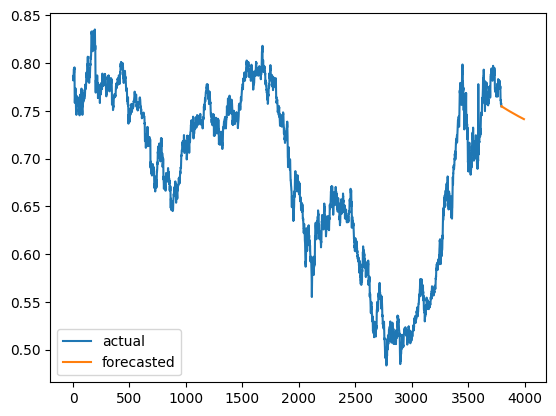

In [ ]:
new_df[['actual','forecasted']].reset_index(drop=True).plot()  #predicted curve

<Axes: xlabel='date'>

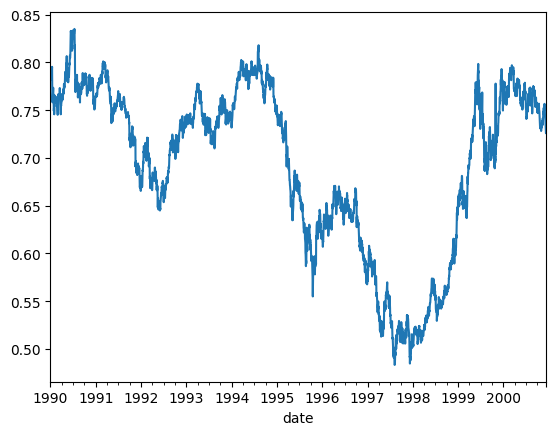

In [ ]:
ex['Ex_rate'][:4000].plot()  #orginal curve

**The predicted curve closely resembles the original curve**

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
mean_absolute_error(test[:200], fc_df)

0.010569995680903825

In [ ]:
mean_squared_error(test[:200], fc_df)

0.00015804467596614607

## Model Building - Exponential Smoothing

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing # SES
from statsmodels.tsa.holtwinters import Holt # Holts Exponential Smoothing
from statsmodels.tsa.holtwinters import ExponentialSmoothing

<Axes: xlabel='date'>

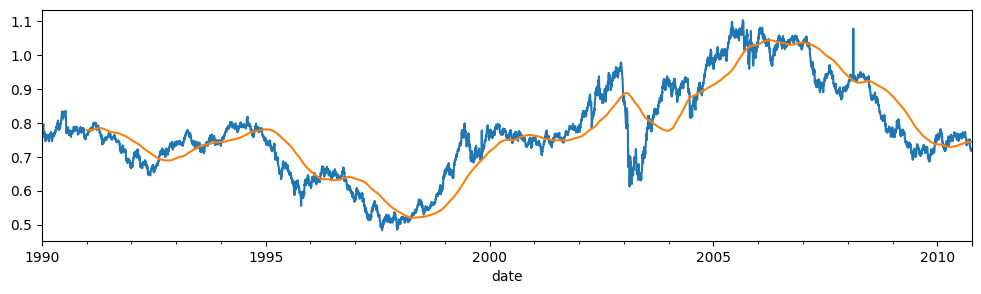

In [ ]:
plt.figure(figsize=(12,3))

ex["Ex_rate"].plot()
ex["Ex_rate"].rolling(366).mean().plot()

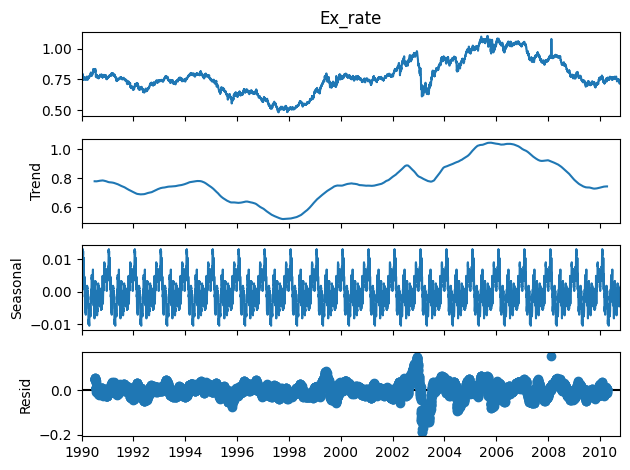

In [ ]:
decompose_ts_add = seasonal_decompose(ex.Ex_rate,period=366)
decompose_ts_add.plot()
plt.show()

In [ ]:
def MAPE(pred,org):
    temp = np.abs((pred-org)/org)*100
    return np.mean(temp)

In [ ]:
ex

,Ex_rate
date,
1990-01-01,0.785500
1990-01-02,0.781800
1990-01-03,0.786700
1990-01-04,0.786000
1990-01-05,0.784900
...,...
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197


In [ ]:
Train = ex.head(7305)
Test = ex.tail(283)
Test

,Ex_rate
date,
2010-01-01,0.751908
2010-01-02,0.751287
2010-01-03,0.750835
2010-01-04,0.750835
2010-01-05,0.754006
...,...
2010-10-06,0.718494
2010-10-07,0.721839
2010-10-08,0.723197


**Simple Exponential Method**

In [ ]:
ses_model = SimpleExpSmoothing(Train["Ex_rate"]).fit(smoothing_level=0.9,optimized=False)
pred_ses = ses_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_ses,Test.Ex_rate)

1.6360614834607292

**Holt method**

In [ ]:
# Holt method
hw_model = Holt(Train["Ex_rate"]).fit(smoothing_level=0.9, smoothing_trend=0.1,optimized=False)
pred_hw = hw_model.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hw,Test.Ex_rate)

8.125404005097998

**Holts winter exponential smoothing with multiplicative seasonality and additive trend**

In [ ]:
hwe_model_mul_add = ExponentialSmoothing(Train["Ex_rate"],seasonal="mul",trend="add",seasonal_periods=366).fit()
pred_hwe_mul_add = hwe_model_mul_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_mul_add,Test.Ex_rate)

1.590479880256562

**Holts winter exponential smoothing with additive seasonality and additive trend**

In [ ]:
hwe_model_add_add = ExponentialSmoothing(Train["Ex_rate"],seasonal="add",trend="add",seasonal_periods=366).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
MAPE(pred_hwe_add_add,Test.Ex_rate)

1.5099615748301083

In [ ]:
alpha_values = [0.1, 0.3, 0.5, 0.7, 0.9]  # Smoothing level
beta_values = [0.1, 0.3, 0.5, 0.7, 0.9]   # Smoothing trend

best_mape = np.inf
best_params = None

for alpha, beta in itertools.product(alpha_values, beta_values):
    try:
      hwe_model_add_add = ExponentialSmoothing(Train["Ex_rate"],seasonal="add",trend="add",seasonal_periods=366).fit(smoothing_level=alpha, smoothing_slope=beta)
      pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
      mape_val=MAPE(pred_hwe_add_add,Test.Ex_rate)
      if mape_val < best_mape:
            best_mape = mape_val
            best_params = (alpha, beta)
    except:
        pass

print("Best MAPE:", best_mape)
print("Best Parameters", best_params)

Best MAPE: 2.695618492365059
Best Parameters (0.3, 0.7)


In [ ]:
hwe_model_add_add = ExponentialSmoothing(Train["Ex_rate"],seasonal="add",trend="add",seasonal_periods=366).fit(smoothing_level=0.3, smoothing_slope=0.7)
pred_hwe_add_add = hwe_model_add_add.predict(start = Test.index[0],end = Test.index[-1])
mape_val=MAPE(pred_hwe_add_add,Test.Ex_rate)
mape_val

2.695618492365059

In [ ]:
pred_hwe_add_add

2010-01-01    0.762396
2010-01-02    0.761366
2010-01-03    0.761036
2010-01-04    0.758497
2010-01-05    0.759884
                ...   
2010-10-06    0.761508
2010-10-07    0.762326
2010-10-08    0.762820
2010-10-09    0.762099
2010-10-10    0.763253
Freq: D, Length: 283, dtype: float64

In [ ]:
fc_df1=pd.DataFrame(pred_hwe_add_add,columns=['forecasted'])
fc_df1

,forecasted
2010-01-01,0.762396
2010-01-02,0.761366
2010-01-03,0.761036
2010-01-04,0.758497
2010-01-05,0.759884
...,...
2010-10-06,0.761508
2010-10-07,0.762326
2010-10-08,0.762820
2010-10-09,0.762099


In [ ]:
new_df=pd.concat([Train,fc_df1])
new_df

,Ex_rate,forecasted
1990-01-01,0.7855,NaN
1990-01-02,0.7818,NaN
1990-01-03,0.7867,NaN
1990-01-04,0.7860,NaN
1990-01-05,0.7849,NaN
...,...,...
2010-10-06,NaN,0.761508
2010-10-07,NaN,0.762326
2010-10-08,NaN,0.762820
2010-10-09,NaN,0.762099


Text(0, 0.5, 'Exchange Rate')

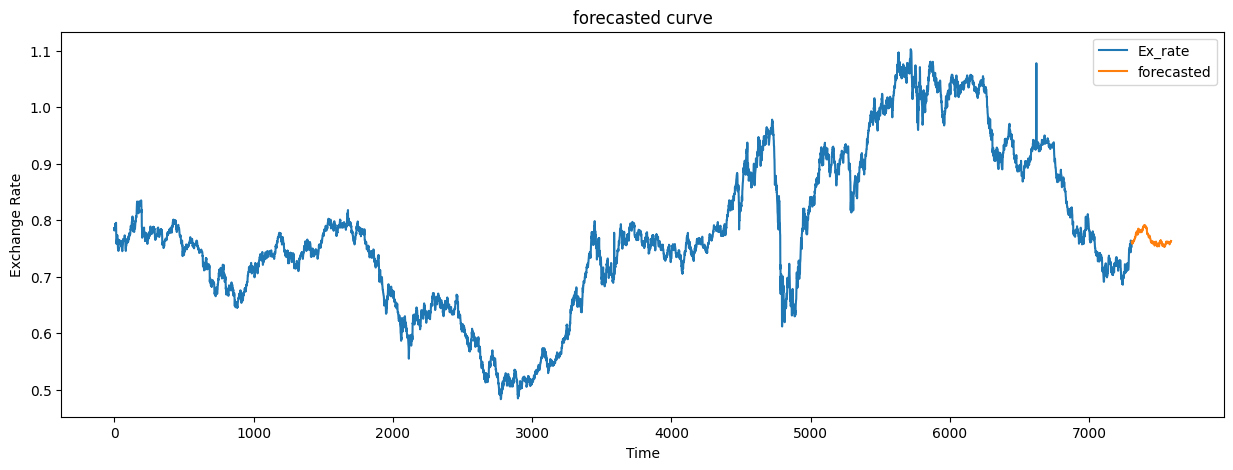

In [ ]:


ax=new_df[['Ex_rate','forecasted']].reset_index(drop=True).plot(figsize=(15, 5))      #forecasted curve
ax.set_title('forecasted curve')
ax.set_xlabel('Time')
ax.set_ylabel('Exchange Rate')

Text(24.000000000000007, 0.5, 'Exchange Rate')

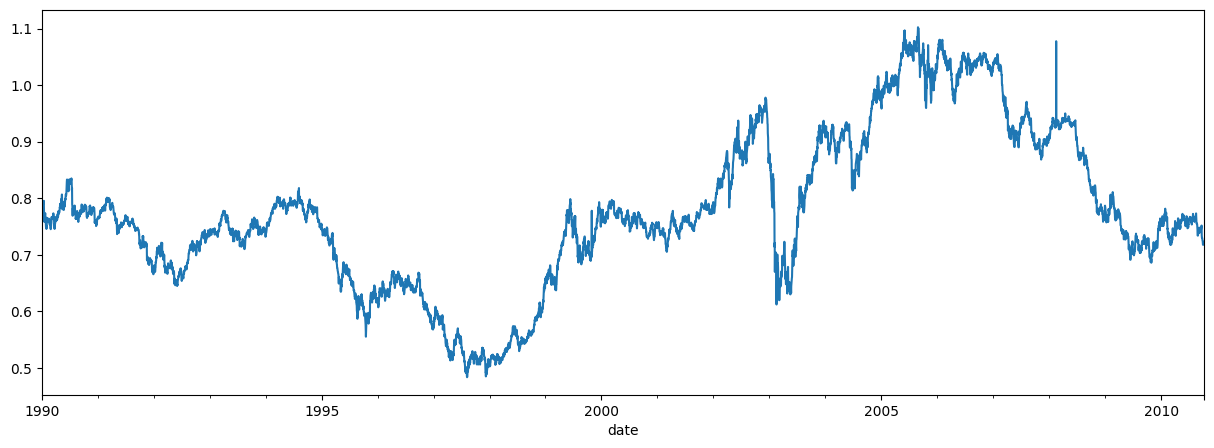

In [ ]:
ex['Ex_rate'].plot(figsize=(15, 5))
ax.set_title('Orginal curve')
ax.set_xlabel('Time')
ax.set_ylabel('Exchange Rate')                                                  #original curve

**The predicted curve closely resembles the original curve**

## Evaluation and Comparison

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error

### For ARIMA Model

In [ ]:
# Calculate MAE
mean_absolute_error(test[:200], fc_df)

0.010569995680903825

In [ ]:
# Calculate RMSE
np.sqrt(mean_squared_error(test[:200], fc_df))

0.012571582078885143

In [ ]:
# Calculate MAPE
MAPE(fc_df,test[:200])

1.3909480209286817

### For Exponential Smoothing Model

In [ ]:
# Calculate MAE
mean_absolute_error(Test.Ex_rate,pred_hwe_add_add)

0.019927486176518853

In [ ]:
# Calculate RMSE
np.sqrt(mean_squared_error(Test.Ex_rate,pred_hwe_add_add))

0.027063379962655558

In [ ]:
# Calculate MAPE
MAPE(pred_hwe_add_add,Test.Ex_rate)

2.695618492365059

ARIMA model perform more accurate forecasts based on these metrics.

**ARIMA**:

**Advantages:** ARIMA models can capture complex time series patterns, including trend and seasonality. They are versatile and can be applied to various types of data.

**Limitations:** ARIMA models require the data to be stationary, and determining the appropriate orders (p, d, q) can be challenging. They may not perform well with irregular or noisy data.

**Exponential Smoothing:**

**Advantages:** Exponential Smoothing models are simple and easy to interpret. They can capture trend and seasonality without the need for differencing. They are computationally efficient.

**Limitations:**Exponential Smoothing models may not perform well with highly irregular or volatile data. They may not capture long-term trends or complex patterns as effectively as ARIMA models.

### **Conclusion**

ARIMA model perform more accurate forecasts based on these metrics.

The ARIMA model and Exponential Smoothing model were evaluated based on error metrics such as MAE, RMSE, and MAPE.

The model with lower error metrics indicates better performance in forecasting exchange rates.

The ARIMA model might perform better if the dataset exhibits significant trend and seasonality components and is relatively stationary after preprocessing.

Exponential Smoothing models could be more suitable for datasets with less complex patterns, where simplicity and interpretability are preferred over complexity

The choice between ARIMA and Exponential Smoothing models depends on the characteristics of the dataset, including the presence of trend, seasonality, and stationarity.

It's essential to consider the trade-offs between model complexity, interpretability, and forecasting accuracy when selecting the appropriate model for a specific dataset.